In [1]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [2]:
ls

MyDrive/  Shareddrives/


In [3]:
cd/gdrive/MyDrive/Papaya classification/

/gdrive/MyDrive/Papaya classification


In [4]:
ls

mature/  partiallymature/  unmature/


In [5]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import load_img

In [6]:
import os
import PIL
import pathlib
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils

In [7]:
BATCH_SIZE = 62
IMAGE_SIZE = 256
EPOCHS=20
CHANNELS=3

In [8]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/gdrive/MyDrive/Papaya classification",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 300 files belonging to 3 classes.


In [9]:
class_names = dataset.class_names
class_names

['mature', 'partiallymature', 'unmature']

In [10]:
len(dataset)

5

In [11]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(image_batch[1])
  print(label_batch.numpy())

(62, 256, 256, 3)
tf.Tensor(
[[[133.58963 139.06206 149.95854]
  [134.96942 140.37308 151.78258]
  [140.12195 147.85938 158.11523]
  ...
  [204.93079 220.93079 253.93079]
  [205.62305 221.62305 254.62305]
  [205.22635 221.22635 254.22635]]

 [[183.83398 195.70312 243.4414 ]
  [179.25    191.11914 238.85742]
  [179.42715 191.2963  239.03458]
  ...
  [204.1836  220.1836  253.1836 ]
  [203.13086 219.13086 252.13086]
  [205.      221.      254.     ]]

 [[190.88477 204.88477 253.88477]
  [187.97461 201.97461 250.97461]
  [187.79068 201.79068 250.79068]
  ...
  [205.      221.      254.     ]
  [204.19473 220.19473 253.19473]
  [203.      219.      252.     ]]

 ...

 [[137.88477 148.88477 176.88477]
  [138.10489 149.10489 177.10489]
  [135.83755 146.83755 174.83755]
  ...
  [175.72232 188.72232 222.72232]
  [176.      189.      223.     ]
  [173.92664 186.92664 220.92664]]

 [[137.      148.      176.     ]
  [137.24997 148.24997 176.24997]
  [136.05273 147.05273 175.05273]
  ...
  [175.86

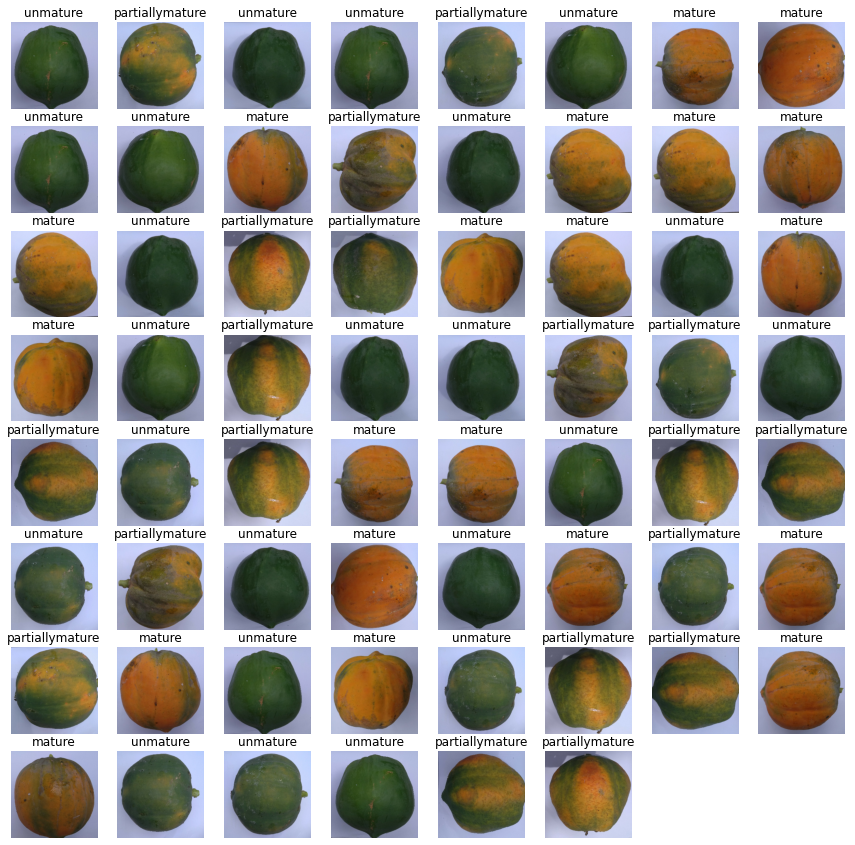

In [12]:
plt.figure(figsize=(15, 15))
for image_batch, labels_batch in dataset.take(1):
    for i in range(BATCH_SIZE):
        ax = plt.subplot(8, 8, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [13]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    # Autotune all the 3 datasets 
    train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    return train_ds, val_ds, test_ds

In [14]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [15]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [16]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [17]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 9

model = models.Sequential([
    resize_and_rescale,
    # data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [18]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (62, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (62, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (62, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (62, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (62, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (62, 60, 60, 64)         

In [20]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/20
4/4 [==============================] - 31s 6s/step - loss: 2.1793 - accuracy: 0.2395
Epoch 2/20
4/4 [==============================] - 24s 6s/step - loss: 1.7629 - accuracy: 0.3193
Epoch 3/20
4/4 [==============================] - 24s 6s/step - loss: 1.0302 - accuracy: 0.4412
Epoch 4/20
4/4 [==============================] - 26s 7s/step - loss: 0.7794 - accuracy: 0.6639
Epoch 5/20
4/4 [==============================] - 24s 6s/step - loss: 0.6083 - accuracy: 0.7101
Epoch 6/20
4/4 [==============================] - 24s 6s/step - loss: 0.5500 - accuracy: 0.7605
Epoch 7/20
4/4 [==============================] - 24s 6s/step - loss: 0.3315 - accuracy: 0.8782
Epoch 8/20
4/4 [==============================] - 25s 6s/step - loss: 0.2529 - accuracy: 0.8908
Epoch 9/20
4/4 [==============================] - 25s 6s/step - loss: 0.1749 - accuracy: 0.9244
Epoch 10/20
4/4 [==============================] - 26s 6s/step - loss: 0.1351 - accuracy: 0.9328
Epoch 11/20
4/4 [======================

In [21]:
model.evaluate(test_ds)

1/1 [==============================] - 8s 8s/step - loss: 0.0671 - accuracy: 0.9839


[0.06711621582508087, 0.9838709831237793]

In [22]:
acc = history.history['accuracy']
loss = history.history['loss']

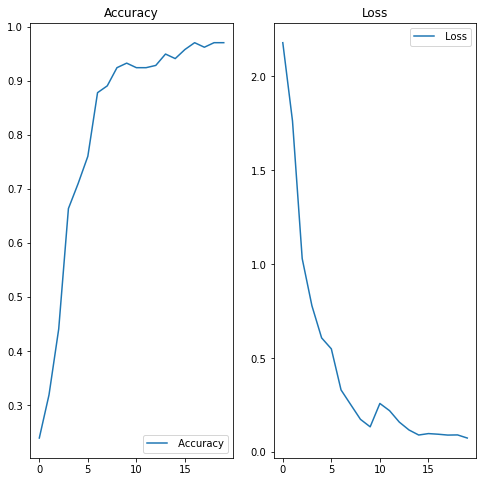

In [23]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label=' Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label=' Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

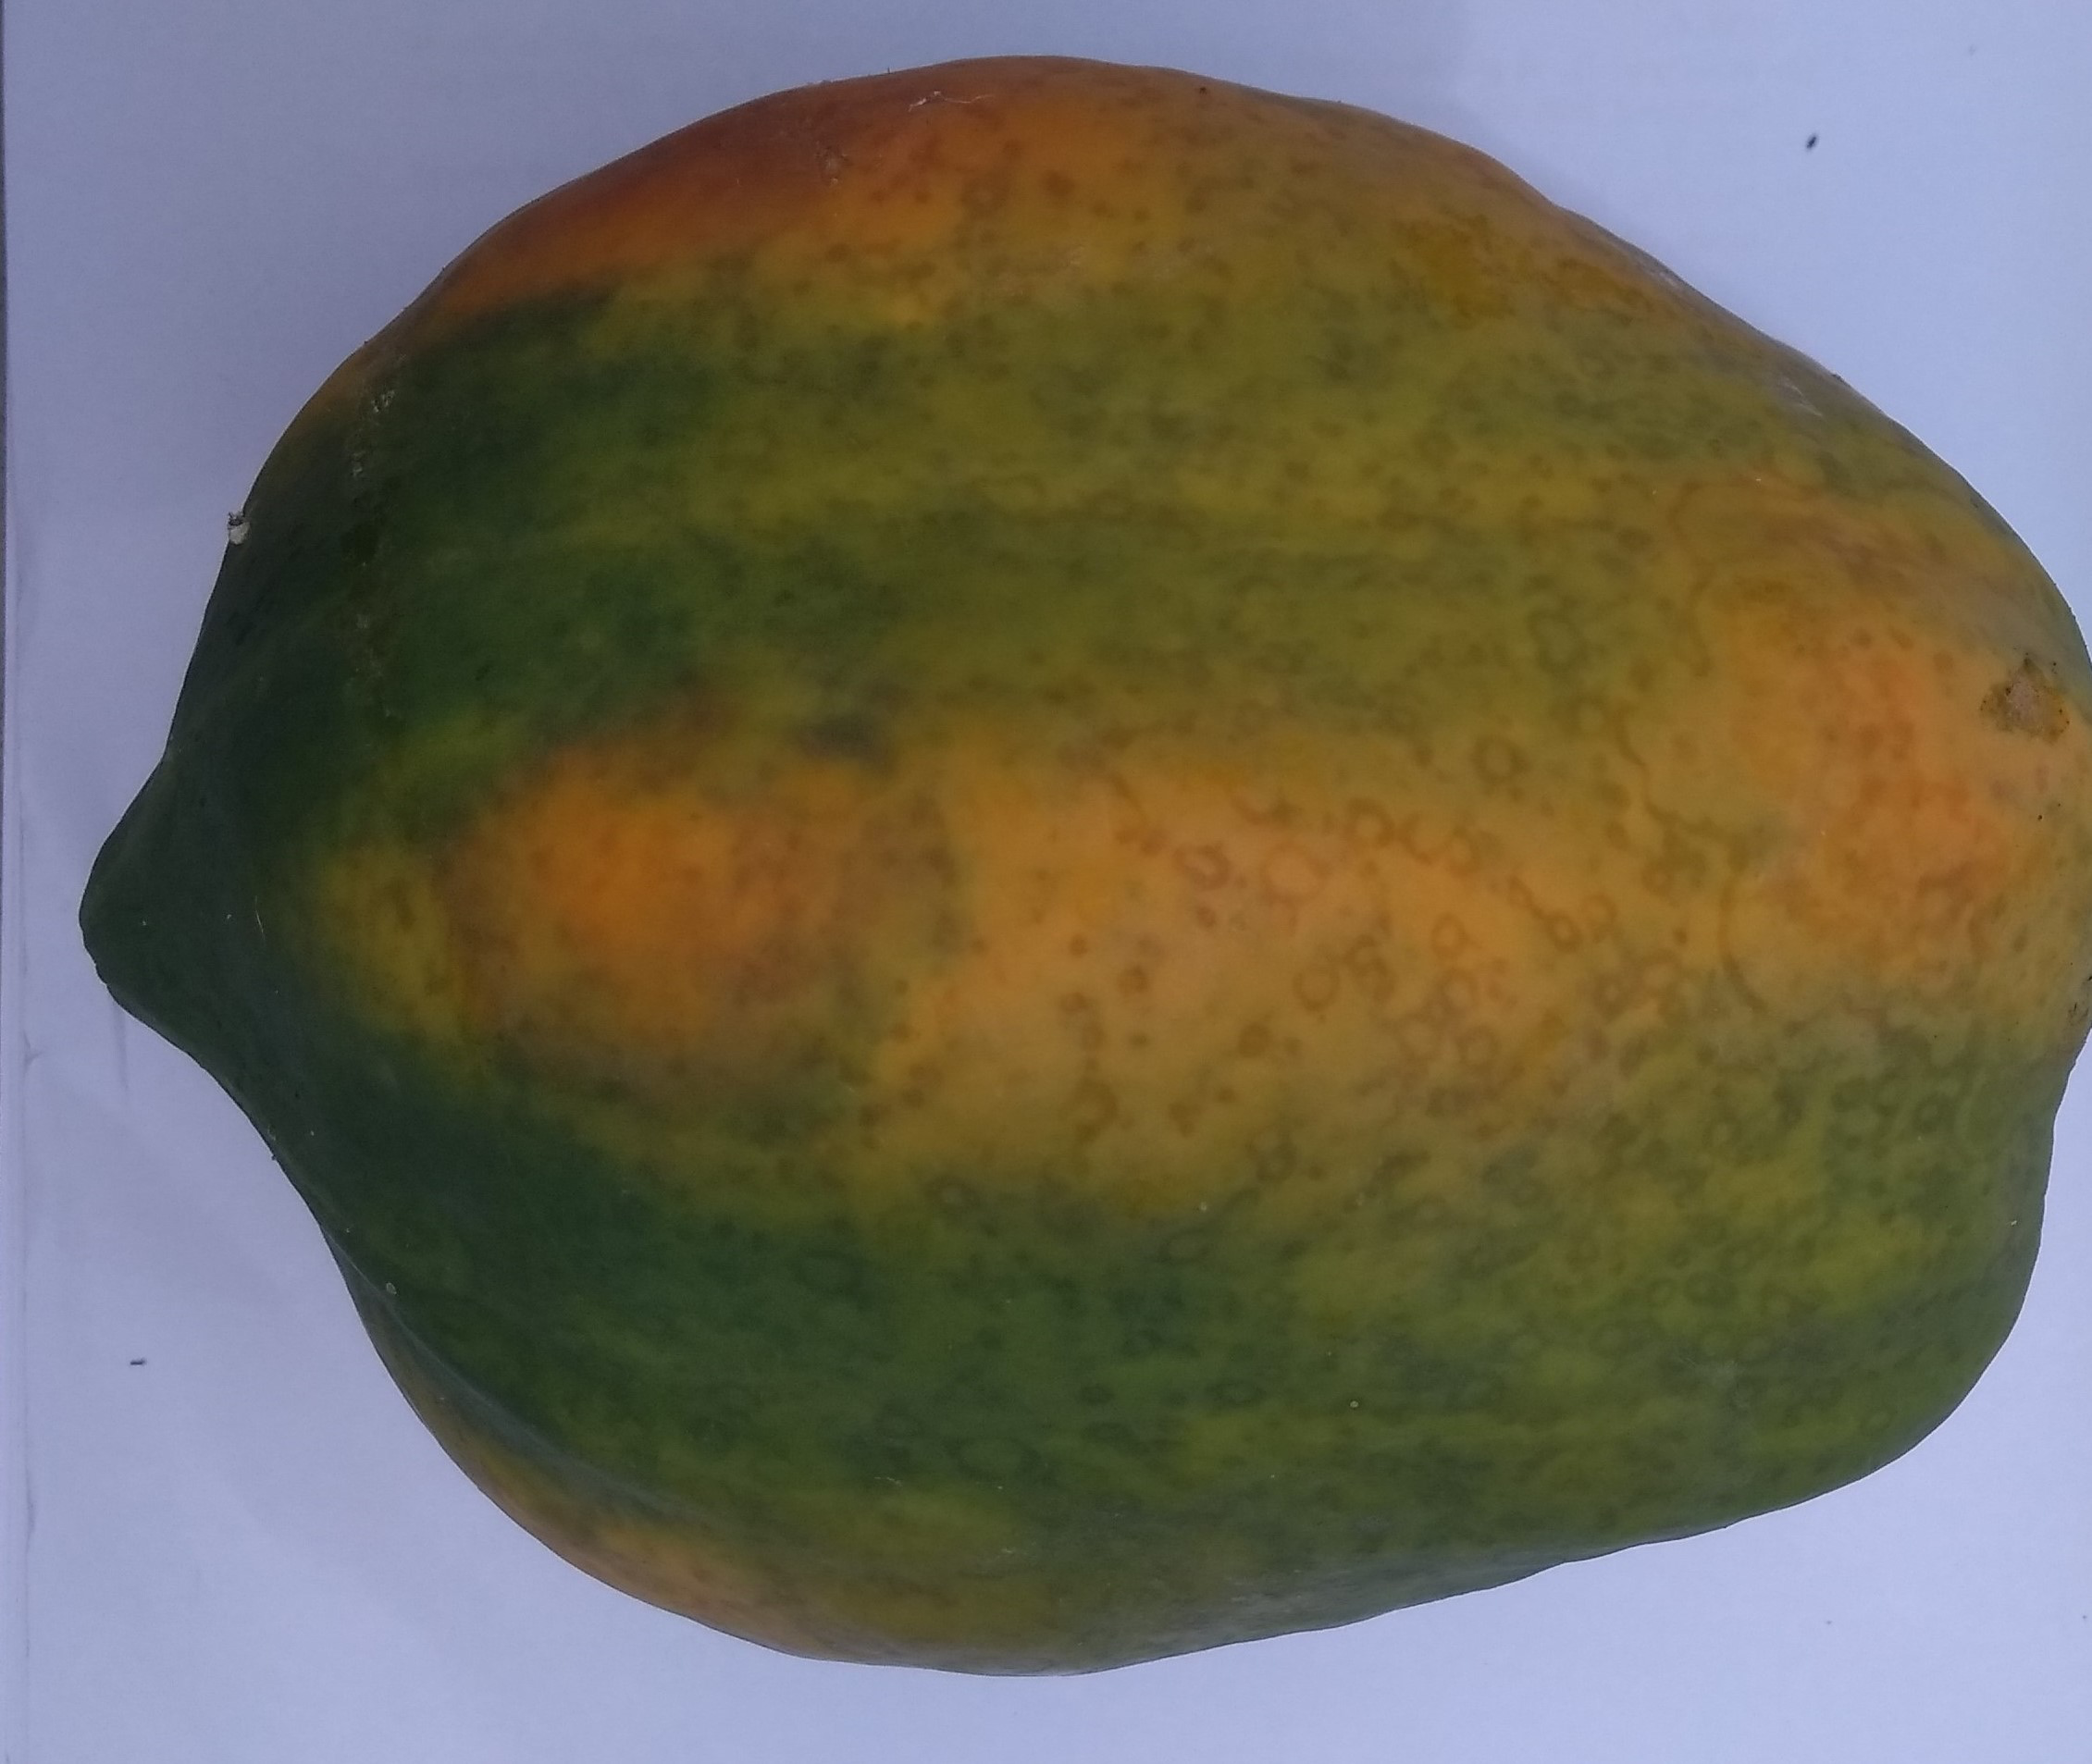

In [24]:
image_path = "/gdrive/My Drive/partiallymature_096.jpg"
image = preprocessing.image.load_img(image_path)
image_array = preprocessing.image.img_to_array(image)
scaled_img = np.expand_dims(image_array, axis=0)
image

In [25]:
pred = model.predict(scaled_img)

In [26]:
output = class_names[np.argmax(pred)]

In [27]:
output

'partiallymature'

In [28]:
model.save("Papaya_classification.h5")